# Definimos la funcion para convertir a dataset

In [12]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

def ToDataset(lista,intervalo,delimit,Fs):
    Ts = 1/Fs
    i = 0
    tgt = []
    dataset = {}
    for file in lista:
        sensor = np.genfromtxt(file + ".txt", delimiter="\t")
        d = delimit[i]
        sensor = sensor[:,-2]
        sensor = sensor[int(d[0]*Fs):int(d[1]*Fs)]
        t = np.arange(0,sensor.shape[0]) * Ts
        st_sensor = np.concatenate((t.reshape(-1,1),  sensor.reshape(-1,1)), axis=1)
        df = pd.DataFrame(st_sensor, columns=["t",file])
        df = df.set_index("t")
        a = int(np.ceil(df.index.max()/intervalo[i]))
        b = int(df.shape[0]/a)
        d_obs = df[file].values.reshape(a,b)
        target = np.repeat(i, sensor.shape[0])
        tgt.append(target)
        dataset.update({file:d_obs})
        i+=1
    tgt = np.hstack((tgt[0],tgt[1],tgt[2]))
    dataset.update({'Target':tgt})
    return dataset;

# Definimos el intervalo (periodo que se va a evaluar) por cada función

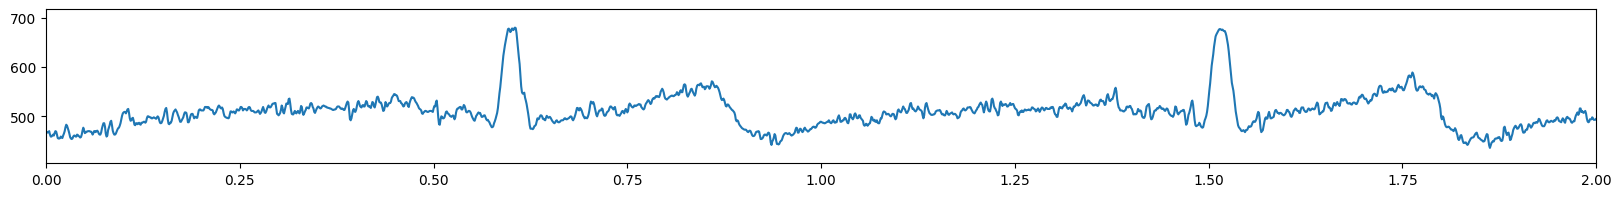

In [13]:
Fs = 1000 #Frecuencia de muestreo del dispositivo de adquisición
Ts = 1/Fs

# ['Basal 1', 'Respiracion', 'Post-ejercicio']
sensor = np.genfromtxt("Basal 1.txt", delimiter="\t")
sensor = sensor[:,-2]
t = np.arange(0,sensor.shape[0]) * Ts
plt.figure(figsize = (20,2))
plt.plot(t,sensor)
plt.xlim(0,2) # Aqui se tiene que variar para definir un intervalo
plt.show()

# Procedemos a convertir a dataset

In [14]:
# Aqui se establecen los nombres de los archivos a evaluar
lista = ['Basal 1', 'Respiracion', 'Post-ejercicio']
# Aqui se establecen, EN EL MISMO ORDEN QUE LOS ARCHIVOS, los intervalos definidos previamente
intervalo = [1,0.87,0.46]
# Aqui se establecen las delimitaciones como tuplas (inicio, fin) en segundos; de donde a donde se debe evaluar la señal.
# Tener en cuenta que la longitud del area delimitada debe ser un multiplo dele intervalo elegido.
delimit = [(0,35),(0.48,30.93),(10,42.2)]
# Frecuencia de muestreo del dispositivo de adquisición
Fs = 1000
# La función ToDataset() recibe la lista de nombres de los archivos a evaluar, la lista de intervalos por cada archivo, la lista de los limites de cada archivo
# y la frecuencia de muestreo del dispositivo de adquisición.
dataset = ToDataset(lista,intervalo,delimit,Fs)
dataset

{'Basal 1': array([[470., 468., 467., ..., 474., 476., 478.],
        [479., 479., 477., ..., 503., 506., 516.],
        [516., 509., 511., ..., 502., 507., 508.],
        ...,
        [508., 511., 508., ..., 512., 508., 508.],
        [509., 508., 508., ..., 525., 521., 520.],
        [524., 532., 537., ..., 505., 504., 505.]]),
 'Respiracion': array([[467., 457., 450., ..., 443., 438., 435.],
        [439., 443., 446., ..., 461., 461., 461.],
        [459., 457., 458., ..., 496., 495., 492.],
        ...,
        [518., 527., 527., ..., 498., 512., 526.],
        [534., 536., 543., ..., 512., 512., 515.],
        [522., 523., 525., ..., 523., 519., 507.]]),
 'Post-ejercicio': array([[522., 525., 522., ..., 518., 520., 524.],
        [527., 529., 529., ..., 545., 548., 554.],
        [564., 575., 580., ..., 587., 587., 585.],
        ...,
        [425., 434., 446., ..., 497., 493., 493.],
        [502., 508., 512., ..., 483., 482., 477.],
        [479., 485., 485., ..., 495., 495., 49